In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
trees = os.listdir(r'D:\Tree_NoTree_Dataset\Tree_Images\train')

In [17]:
batch_size = 32
img_height = 256
img_width = 256
train_ds = tf.keras.utils.image_dataset_from_directory(
  r'D:\\Tree_NoTree_Dataset\\Tree_Images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

val_ds = tf.keras.utils.image_dataset_from_directory(
   r'D:\\Tree_NoTree_Dataset\\Tree_Images',
  validation_split=0.2,
  subset="validation",
  seed=123, image_size=(img_height, img_width))

class_names = train_ds.class_names
print(class_names)

Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
['Test', 'Train']


(32, 256, 256, 3)
(32,)


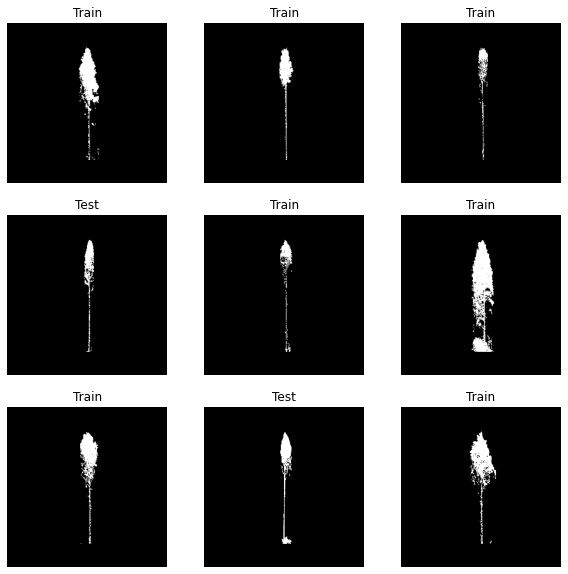

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [24]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20
13/13 [==============================] - 4s 304ms/step - loss: 0.4498 - accuracy: 0.7725 - val_loss: 0.4210 - val_accuracy: 0.7700
Epoch 2/20
13/13 [==============================] - 1s 113ms/step - loss: 0.3700 - accuracy: 0.8175 - val_loss: 0.3357 - val_accuracy: 0.8100
Epoch 3/20
13/13 [==============================] - 1s 108ms/step - loss: 0.3365 - accuracy: 0.8550 - val_loss: 0.2935 - val_accuracy: 0.8700
Epoch 4/20
13/13 [==============================] - 1s 112ms/step - loss: 0.2960 - accuracy: 0.8850 - val_loss: 0.2692 - val_accuracy: 0.8500
Epoch 5/20
13/13 [==============================] - 1s 107ms/step - loss: 0.2687 - accuracy: 0.8875 - val_loss: 0.2417 - val_accuracy: 0.8700
Epoch 6/20
13/13 [==============================] - 1s 91ms/step - loss: 0.2223 - accuracy: 0.9200 - val_loss: 0.2375 - val_accuracy: 0.8800
Epoch 7/20
13/13 [==============================] - 1s 95ms/step - loss: 0.1809 - accuracy: 0.9300 - val_loss: 0.2379 - val_accuracy: 0.8800
Epoch 8/

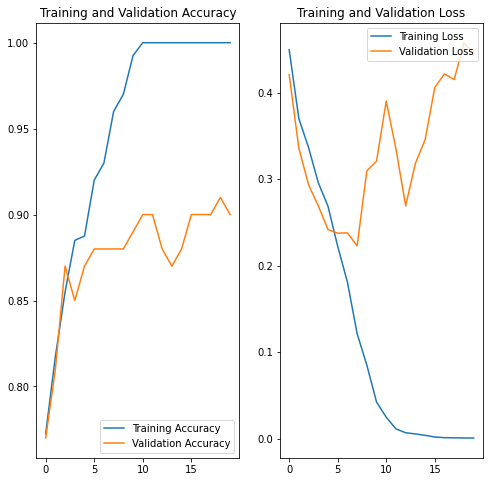

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model.save(r'D:\\Tree_NoTree_Dataset\\treechecker.model')

INFO:tensorflow:Assets written to: D:\\Tree_NoTree_Dataset\\treechecker.model\assets
